### Import necessary Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import joblib

### Read the data

In [25]:
df = pd.read_csv('spam.csv', encoding = 'latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Delete unnecessary columns and rename "v1" and "v2"

In [27]:
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df.drop(columns = columns_to_drop, inplace = True)
df.columns = ["Category", "Message"]

In [28]:
df.columns

Index(['Category', 'Message'], dtype='object')

### Check if there are Mising Values

In [29]:
df.isna().sum()

Category    0
Message     0
dtype: int64

### Check if there are duplicated samples in the data

In [30]:
df.duplicated().sum()

403

### Now let's drop the duplicated samples and check it out again

In [31]:
df = df.drop_duplicates()
df.duplicated().sum()

0

### Visualize Distribution of Email Categories

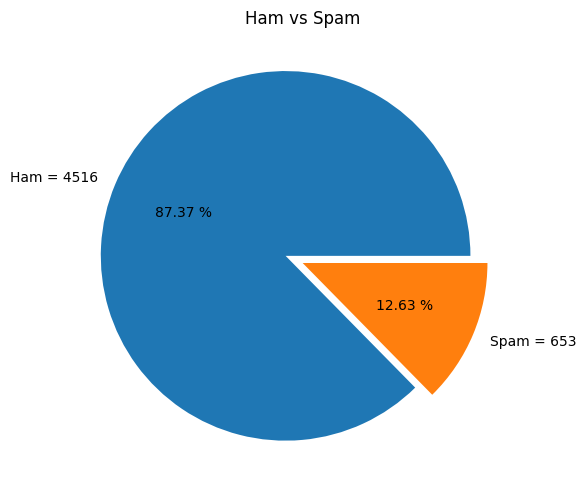

In [32]:
number_of_spam = df[df['Category'] == 'spam'].shape[0]
number_of_ham = df[df['Category'] == 'ham'].shape[0]

plt.figure(figsize=(7,6))

mail_categories = [number_of_ham, number_of_spam]
labels = [f"Ham = {number_of_ham}", f"Spam = {number_of_spam}"]
explode = [.1, 0]

plt.pie(mail_categories, labels = labels, explode = explode, autopct = "%.2f %%")
plt.title("Ham vs Spam")

plt.show()

### Word Cloud for each Category

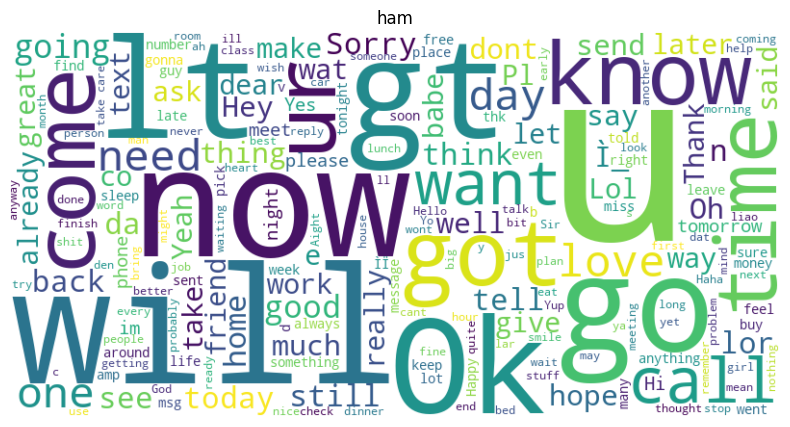

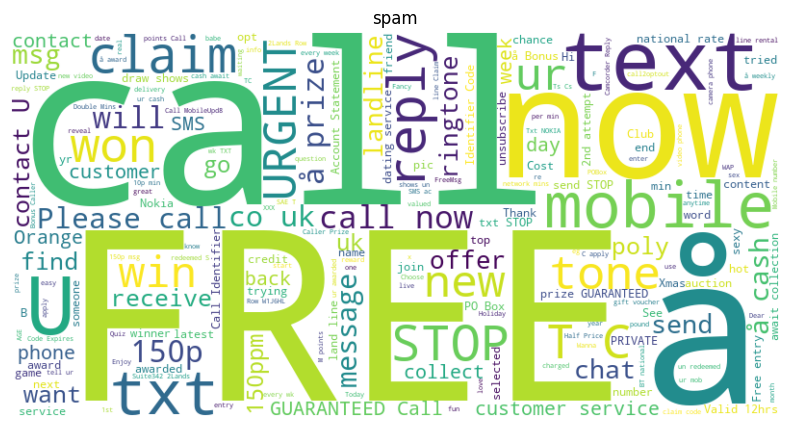

In [33]:
categories = df['Category'].unique()

for category in categories:
    # Concatenate all messages in the same category
    text_data = ' '.join(df[df['Category'] == category]['Message'])
    
    # Generate the word cloud
    wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(text_data)
    
    # Display the word cloud
    plt.figure(figsize = (10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(category)  # Set title as the category name
    plt.axis('off')
    plt.show()

### Make a 'spam' column and replace spams with 1 and replace hams with 0

In [34]:
encoder = LabelEncoder()
df['Spam'] = encoder.fit_transform(df['Category'])
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


### Now we don't need "Category" column anymore, let's delete it

In [35]:
df.drop(columns = 'Category', inplace = True)

### Split the data to Train_set and Test_set 

In [36]:
x = df['Message']
y = df['Spam']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 , random_state = 1)

### Create a bag-of-words representation using CountVectorizer for the training data **x_train**

In [40]:
vectorizer = CountVectorizer()
x_train_counts = vectorizer.fit_transform(x_train)

### Train the naive bayes model
##### There are three main types of NB models(Bernouli,Multinominal,Gaussian).While **Gaussian** Naive Bayes is a powerful classifier suitable for **numerical** features following a **Gaussian distribution**, it's not applicable to this project's context. Our features are based on word frequencies in text data, which are **discrete** and follow a **multinomial distribution**. Therefore, Gaussian Naive Bayes, designed for continuous data, isn't appropriate for this task and I'm gonna use the Multinominal NB.

In [41]:
classifier = MultinomialNB()
classifier.fit(x_train_counts, y_train)

MultinomialNB()

### Now, let's create a bag-of-words representation using CountVectorizer, this time for the test data **x_test**

In [42]:
x_test_counts = vectorizer.transform(x_test)

In [43]:
y_pred = classifier.predict(x_test_counts)

### Display the confusion matrix

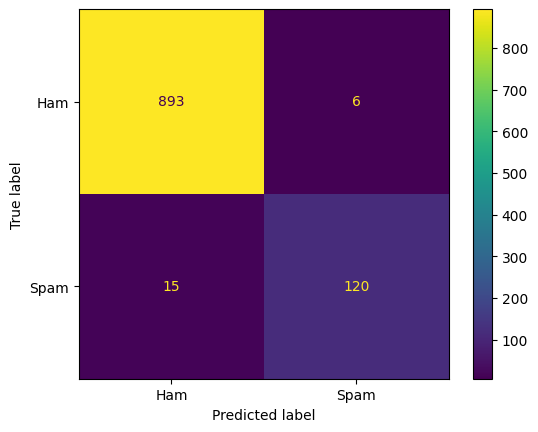

In [44]:
confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Ham", "Spam"])
cm_display.plot()
plt.show()

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       899
           1       0.95      0.89      0.92       135

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



### Test the model with some emailes

In [46]:
emails = [
    "Hey mohammad, I'm at the Ms.Salahshor class wating for you, where are you?",
    
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!',
    
    '''Join us on Saturday, February 24 at 14:00 UTC on our YouTube channel to take this
    interactive lesson, taught by Tutor Darryl.'''
]

emails_count = vectorizer.transform(emails)
classifier.predict(emails_count)

array([0, 1, 1])

In [ ]:
joblib.dump((classifier, vectorizer), 'spam_classifier_model.joblib')